In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier  # sklearn.multiclass 模块通过将多分类问题化为二分类问题来处理 multiclass 和 multilabel 分类问题。

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
#导入鸢尾花的数据集，并且设定X和y，X指的是各种特征的数据，y指的是分类结果。他们均是np.array形式。

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,  random_state=0)
#将数据集分为训练集和测试集，比例为1：1

In [4]:
alpha = np.logspace(-2, 2, 20)  #设置超参数范围
model = LogisticRegressionCV(Cs = alpha, cv = 3, penalty = 'l2')  #使用L2正则化
model.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV(Cs=array([1.00000000e-02, 1.62377674e-02, 2.63665090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02]),
                     cv=3)

In [5]:
y_score = model.predict_proba(X_test)
y_score

array([[1.24788940e-02, 3.20019012e-01, 6.67502094e-01],
       [9.60196594e-02, 7.70813646e-01, 1.33166694e-01],
       [9.49169866e-01, 4.94906406e-02, 1.33949374e-03],
       [9.94978361e-04, 1.38462752e-01, 8.60542269e-01],
       [9.14044897e-01, 8.46668703e-02, 1.28823272e-03],
       [1.74311628e-03, 1.08021648e-01, 8.90235236e-01],
       [9.34319457e-01, 6.47295072e-02, 9.51035589e-04],
       [3.47829849e-02, 4.62676087e-01, 5.02540928e-01],
       [2.65785725e-02, 5.05555018e-01, 4.67866409e-01],
       [1.16874019e-01, 6.60378836e-01, 2.22747145e-01],
       [9.01581458e-03, 4.15578193e-01, 5.75405992e-01],
       [5.68516795e-02, 4.99454788e-01, 4.43693533e-01],
       [4.70876450e-02, 5.99627867e-01, 3.53284488e-01],
       [3.89787204e-02, 5.43214883e-01, 4.17806397e-01],
       [4.41601602e-02, 5.48921718e-01, 4.06918122e-01],
       [9.36940978e-01, 6.21765624e-02, 8.82459154e-04],
       [5.86307092e-02, 5.69957237e-01, 3.71412054e-01],
       [8.09158815e-02, 6.90112

In [6]:
y_test_one_hot = label_binarize(y_test, classes=[0, 1, 2])

In [7]:
# 计算ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_one_hot.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

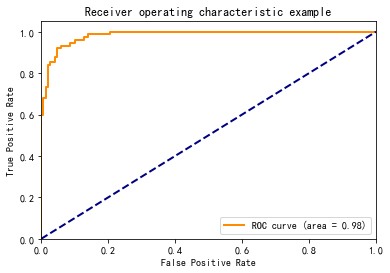

In [8]:
#显示到当前界面，保存为svm.png
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
# plt.savefig('svm.png')